In [1]:
# Load Packages

import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

import matplotlib.pyplot as plt

# Load data

df = pd.read_csv("data.csv")
df.drop(columns=['Close','Close_next_1day'],inplace=True)
    
# Linear Regression Model
x = df.drop('diff_Close_next_1day', axis=1)
y = df['diff_Close_next_1day']

df.columns


Index(['diff_Close_lag_5_4day', 'diff_Close_lag_4_3day',
       'diff_Close_lag_3_2day', 'diff_Close_lag_2_1day',
       'diff_Close_lag_1_0day', 'diff_Close_next_1day', 'RSI_7', 'RSI_8',
       'RSI_9', 'RSI_10', 'RSI_11', 'RSI_12', 'RSI_13', 'RSI_14',
       'MACD_f11_s25_p8', 'MACD_Signal_f11_s25_p8', 'MACD_Hist_f11_s25_p8',
       'MACD_f12_s26_p9', 'MACD_Signal_f12_s26_p9', 'MACD_Hist_f12_s26_p9',
       'MACD_f13_s27_p10', 'MACD_Signal_f13_s27_p10', 'MACD_Hist_f13_s27_p10',
       'MACD_f14_s28_p11', 'MACD_Signal_f14_s28_p11', 'MACD_Hist_f14_s28_p11',
       'MACD_f15_s29_p12', 'MACD_Signal_f15_s29_p12', 'MACD_Hist_f15_s29_p12'],
      dtype='object')

### Linear Regresssion

In [2]:
r2_max = 0

for i in range(1000):
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train) 
    pred = lr_model.predict(X_test)

    df_compare=pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': pred})

    # Calculate R-squared (R²)
    r2 = r2_score(y_test, pred)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, pred)

    # Calculate Mean Square Error (MSE)
    mse = mean_squared_error(y_test, pred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, pred))

    # Print the metrics
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Square Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print("=======================")

    if r2 > r2_max:
        r2_max = r2


print(f"Highest R²: {r2_max}")

R-squared (R²): -0.47352271164344084
Mean Absolute Error (MAE): 0.025198652911844036
Mean Square Error (MSE): 0.0010670509704383945
Root Mean Squared Error (RMSE): 0.03266574613319577
R-squared (R²): 0.02186457861645119
Mean Absolute Error (MAE): 0.02724421063326848
Mean Square Error (MSE): 0.0015280870715696044
Root Mean Squared Error (RMSE): 0.03909075429778255
R-squared (R²): 0.005960449333873186
Mean Absolute Error (MAE): 0.022402731464630732
Mean Square Error (MSE): 0.0010901751217226117
Root Mean Squared Error (RMSE): 0.033017800073939084
R-squared (R²): -0.10507077424450384
Mean Absolute Error (MAE): 0.028322364994918497
Mean Square Error (MSE): 0.0017548949886004122
Root Mean Squared Error (RMSE): 0.04189146677547126
R-squared (R²): 0.04150142678742419
Mean Absolute Error (MAE): 0.024028285268494654
Mean Square Error (MSE): 0.001167871284506869
Root Mean Squared Error (RMSE): 0.03417413180326413
R-squared (R²): 0.04997199672667807
Mean Absolute Error (MAE): 0.02017128140806148


### Random Forest Regressor

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error (MSE): 0.0012
R² Score: -0.1129


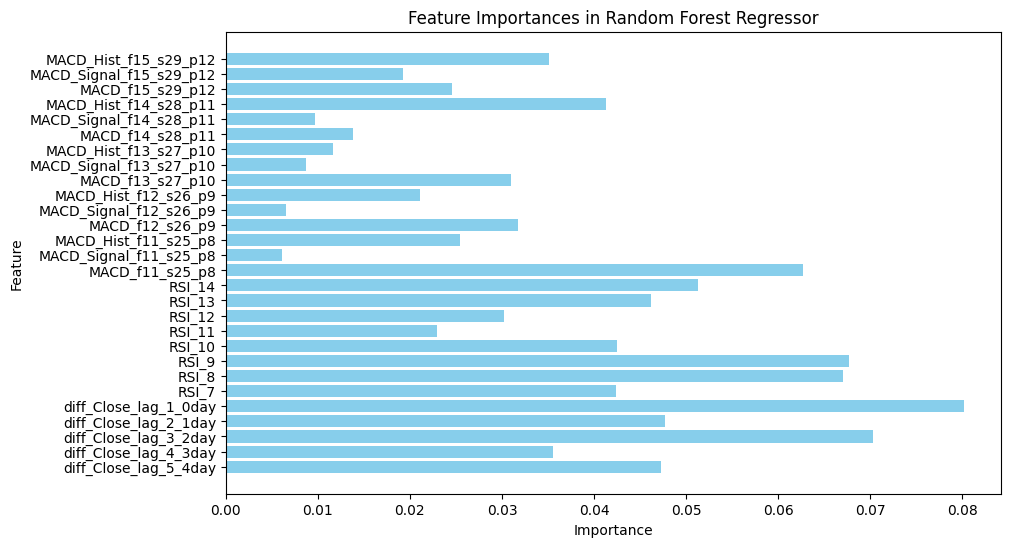

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Set up the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R² Score: {r2:.4f}')

# Visualize the feature importances
feature_importances = best_model.feature_importances_
features = [x.columns[i] for i in range(x.shape[1])]

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Regressor')
plt.show()